In [ ]:
#Exploration of the ridb.recreation.gov API
#Author: Stephan stephan@bayesimpact.org
#The API is pretty well documented on https://usda.github.io/RIDB/ 
#and can be used to obtain information about Recreation Areas, Facilities, Campsites, Tours, etc..
#In order to get an overview of the functionality of this API, I'll use it to plan a trip to the Zion National Park.

In [3]:
#import folium
from IPython.display import Image, HTML, display
import requests
from pprint import pprint
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from subprocess import call
 

%matplotlib inline



In [1]:
import pandas
from census import Census
from us import states
from us import states

zipcodes = pandas.read_csv('greenspace/zip_codes_all.csv')
zipcodes

,Zip
0,10001
1,10002
2,10003
3,10004
4,10005
5,10006
6,10007
7,10009
8,1001
9,10010


In [13]:
raw_data = pd.read_csv("PPL_reservationdata.csv")

In [14]:
raw_data.columns
raw_data.shape

(12473816, 19)

In [109]:
raw_data.groupby("leadtime").top

AttributeError: 'DataFrameGroupBy' object has no attribute 'top'

In [34]:
raw_data

,ID,Agency,Park,SiteType,FacZip,CustZip,CustState,CustCountry,StartDate,EndDate,OrderDate,NumPeople,leadtime,duration,parklat,parklon,cuslat,cuslon,traveldist
0,918682,NPS,FORT SPOKANE,STANDARD NONELECTRIC,99122,99021,WA,USA,20-Jul-2007,22-Jul-2007,10-Jan-2007,2,191,2,47.904603,-118.309153,47.8261150,-117.237496,80.65
1,924430,NPS,FORT SPOKANE,STANDARD NONELECTRIC,99122,83815,ID,USA,25-May-2007,28-May-2007,14-Jan-2007,7,131,3,47.904603,-118.309153,47.7254640,-116.789921,115.51
2,920523,NPS,SPRING CANYON,STANDARD NONELECTRIC,99122,99210,WA,USA,19-Jul-2007,20-Jul-2007,11-Jan-2007,10,189,1,47.933056,-118.939072,47.6588000,-117.425000,117.46
3,914996,NPS,DEVILS GARDEN CAMPGROUND,STANDARD NONELECTRIC,NaN,84121,UT,USA,19-Apr-2007,22-Apr-2007,07-Jan-2007,6,102,3,38.776944,-109.589167,40.6166220,-111.709504,273.47
4,927520,BLM,FISHERMENS BEND,STANDARD ELECTRIC,97360,97385,OR,USA,25-May-2007,28-May-2007,16-Jan-2007,12,129,3,44.757500,-122.510278,44.8645620,-122.747722,22.23
5,911165,BLM,LOON LAKE RECREATION SITE,STANDARD NONELECTRIC,NaN,97470,OR,USA,31-Aug-2007,03-Sep-2007,04-Jan-2007,12,239,3,43.597222,-123.840278,43.2352270,-123.415946,52.90
6,928030,NPS,DEVILS GARDEN CAMPGROUND,STANDARD NONELECTRIC,NaN,59047,MT,USA,31-Mar-2007,04-Apr-2007,16-Jan-2007,4,74,4,38.776944,-109.589167,45.5208200,-110.566230,753.41
7,934376,NPS,SUMMIT LAKE NORTH,STANDARD NONELECTRIC,96063,95670,CA,USA,30-Jul-2007,06-Aug-2007,22-Jan-2007,6,189,7,40.494444,-121.425000,38.6047600,-121.269191,210.23
8,933258,NPS,BUFFALO POINT,STANDARD ELECTRIC,NaN,72703,AR,USA,18-May-2007,20-May-2007,21-Jan-2007,6,117,2,36.073056,-92.556944,36.1181660,-94.059994,135.45
9,1019053,NPS,SHEEP PASS GROUP,GROUP TENT ONLY AREA NONELECTRIC,NaN,90291,CA,USA,11-May-2007,13-May-2007,05-Jan-2007,30,126,2,33.999167,-116.118056,33.9941620,-118.463710,216.71


In [16]:
raw_data.columns


Index([u'ID', u' Agency', u' Park', u' SiteType', u' FacZip', u' CustZip',
       u' CustState', u' CustCountry', u'StartDate', u' EndDate',
       u' OrderDate', u' NumPeople', u'leadtime', u' duration', u' parklat',
       u'parklon', u'cuslat', u'cuslon', u'traveldist'],
      dtype='object')

In [17]:
just_usa = raw_data[raw_data[" CustCountry"] == "USA"]

just_usa.shape

(12043954, 19)

In [44]:
just_usa_lon = just_usa[just_usa.cuslon < -50]
just_usa_latlong = just_usa_lon[just_usa_lon.cuslat >0]
just_usa_latlong.shape

(12002279, 19)

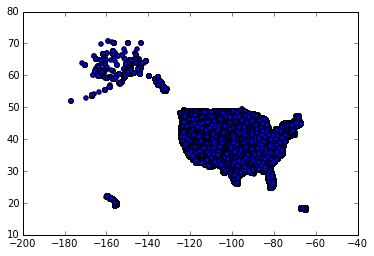

In [45]:
plt.scatter(just_usa_latlong.cuslon.astype(float), just_usa_latlong.cuslat.astype(float))

In [81]:
ls -R | grep 10zp.*.xls >> url_files.txt


In [92]:
url_files = pd.read_csv("url_files.txt", header=None, names = ["path"])

In [4]:
t = "./2010zipcode/" + url_files["path"][0].replace('*', '')
t

#irs_data_1 = pd.read_csv(t, skiprows =[1, 2, 3, 4, 5, 6, 7], usecols=[0, 1, 2])

NameError: name 'url_files' is not defined

In [9]:
c = Census("092046c3e8dd7145cb5c10d14f6b64e292db6249")
aggregate_family_income = pd.DataFrame(c.acs.zipcode('B19127_001E', Census.ALL))

In [26]:
renamed = aggregate_family_income.rename(columns={'B19127_001E': 'Annual Aggregate Family Income'})
renamed.to_csv('aggregate_income.csv')

renamed

In [18]:
merged_data = pd.merge(aggregate_family_income, raw_data, right_on=" CustZip", left_on="zip code tabulation area")

In [29]:
merged_data.columns

Index([             u'B19127_001E', u'zip code tabulation area',
                             u'ID',                  u' Agency',
                          u' Park',                u' SiteType',
                        u' FacZip',                 u' CustZip',
                     u' CustState',             u' CustCountry',
                      u'StartDate',                 u' EndDate',
                     u' OrderDate',               u' NumPeople',
                       u'leadtime',                u' duration',
                       u' parklat',                  u'parklon',
                         u'cuslat',                   u'cuslon',
                     u'traveldist'],
      dtype='object')

In [30]:
grouped_by_zip = merged_data.groupby("zip code tabulation area")


In [53]:
merged_data['visit_sum'] = grouped_by_zip[' NumPeople'].sum()


Index([             u'B19127_001E', u'zip code tabulation area',
                             u'ID',                  u' Agency',
                          u' Park',                u' SiteType',
                        u' FacZip',                 u' CustZip',
                     u' CustState',             u' CustCountry',
                      u'StartDate',                 u' EndDate',
                     u' OrderDate',               u' NumPeople',
                       u'leadtime',                u' duration',
                       u' parklat',                  u'parklon',
                         u'cuslat',                   u'cuslon',
                     u'traveldist',                u'visit_sum'],
      dtype='object')

In [60]:
visits_and_income = pd.DataFrame(merged_data["visit_sum"], merged_data["B19127_001E"])

In [63]:
visits_and_income.corr()

,visit_sum
visit_sum,NaN


In [58]:
merged_data.columns
merged_data.first

<bound method DataFrame.first of          B19127_001E zip code tabulation area          ID  Agency  \
0          106789200                    00601   910525190   USACE   
1          106789200                    00601   924540887   USACE   
2          106789200                    00601   902189350   USACE   
3          106789200                    00601   911771097   USACE   
4          106789200                    00601   871266002   USACE   
5          271129800                    00602   729216808    USFS   
6          271129800                    00602  1940117282     NPS   
7          271129800                    00602  1941347423    USFS   
8          271129800                    00602  1940371785    USFS   
9          271129800                    00602  1940325950     NPS   
10         365923200                    00603   965367261     NPS   
11         554793700                    00612   141109351     NPS   
12         554793700                    00612  1254972070   USACE   
1

In [48]:
visits_and_income = pd.merge(merged_data, visit_sum, on_left='zip code tabulation area', on_right='zip code tabulation area')

TypeError: merge() got an unexpected keyword argument 'on_left'